# <center>The Sparks Foundation - Data Science & Business Analytics Internship</center>

## TASK 3 - Exploratory Data Analysis- Retail
In this task it is required to perform Exploratory Data Analysis on dataset 'SampleSuperstore and find weak areas where we can work to make more profits.

### Steps:

- Step 1 - Importing the necessary libraries for the task.
- Step 2 - Data Visualization
- Step 3 - Insights using stats

Code By : Rikin Patel
#### Dataset : https://bit.ly/3i4rbWl
#### Linkedin : https://www.linkedin.com/in/rikin-patel-700921238/
#### Github :https://github.com/rknptl/TSF-Internship

## Importing the necessary libraries for the task :
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('SampleSuperstore.csv')
data.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [3]:
data.shape #the dataset has 9993 rows and 13 columns

(9994, 13)

In [4]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
data.info() # the output shows that the dataset has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.duplicated().sum()

17

In [7]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [8]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [10]:
data.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.027732e+09,-469412.768497,935.818272,391.989291,-224679.858643
Sales,-4.694128e+05,389028.396022,278.765576,-3.645637,70057.067126
Quantity,9.358183e+02,278.765576,4.958001,0.003990,34.565743
Discount,3.919893e+02,-3.645637,0.003990,0.042624,-10.632751
Profit,-2.246799e+05,70057.067126,34.565743,-10.632751,54970.478824


# Data visualization :
***

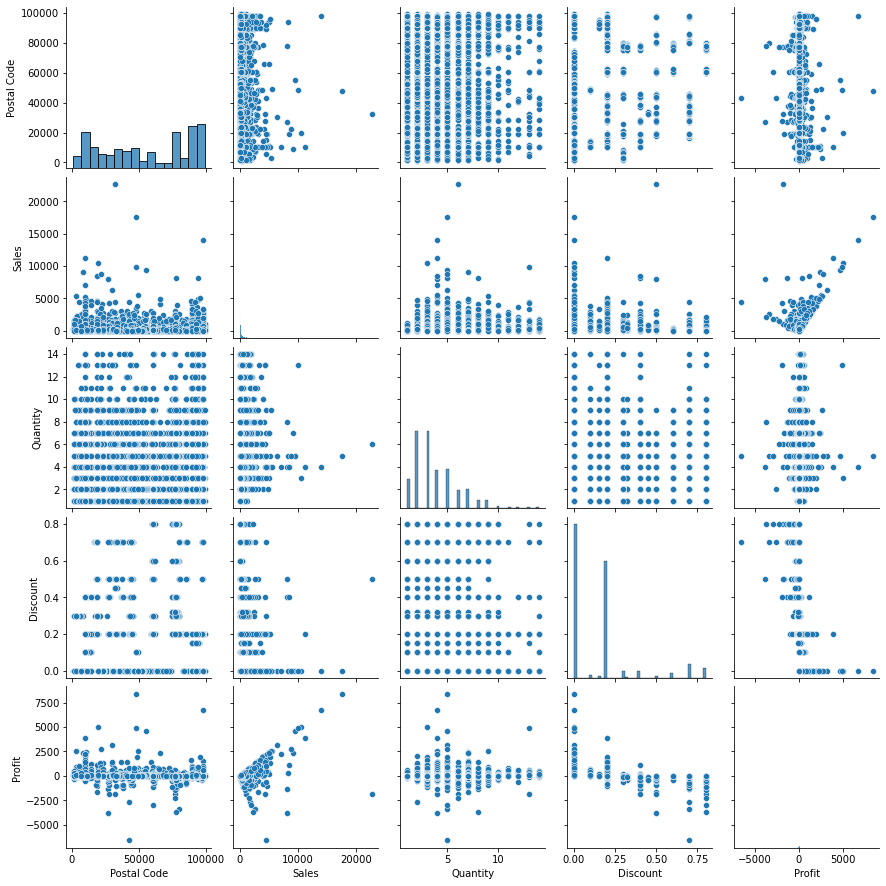

In [11]:
sns.pairplot(data);

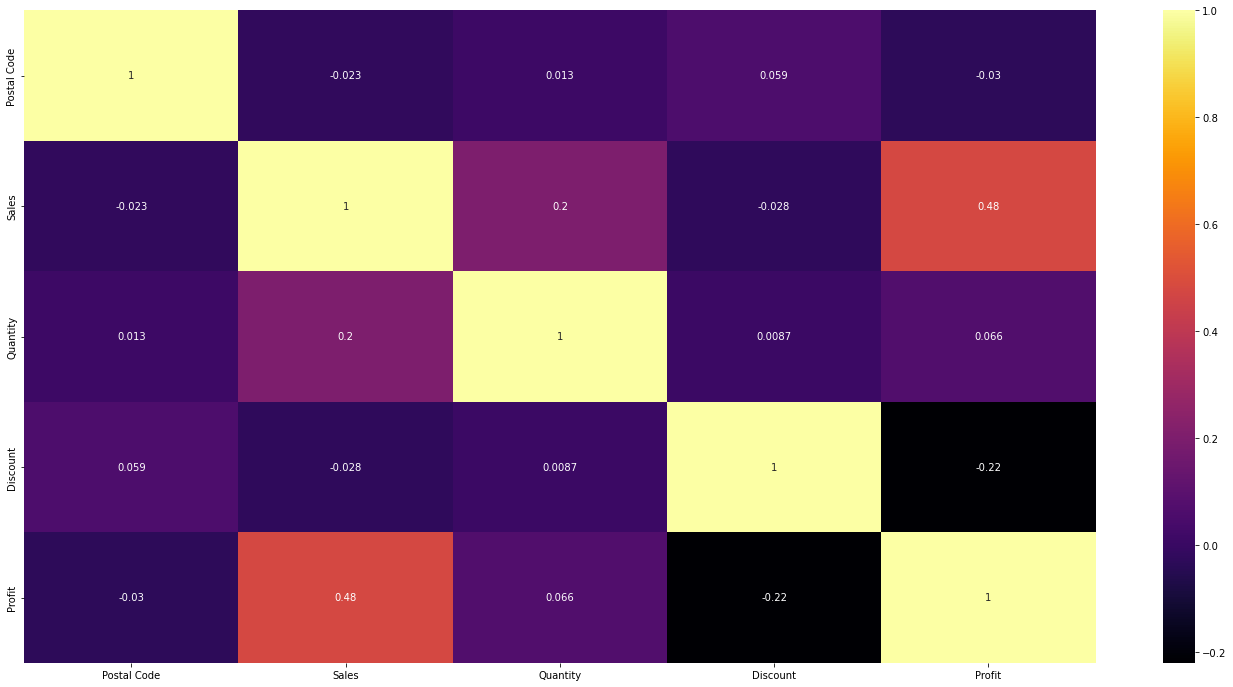

In [12]:
fig, axes = plt.subplots (1, 1, figsize = (24,12))
sns.heatmap(data.corr(), annot=True, cmap='inferno')
plt.show()

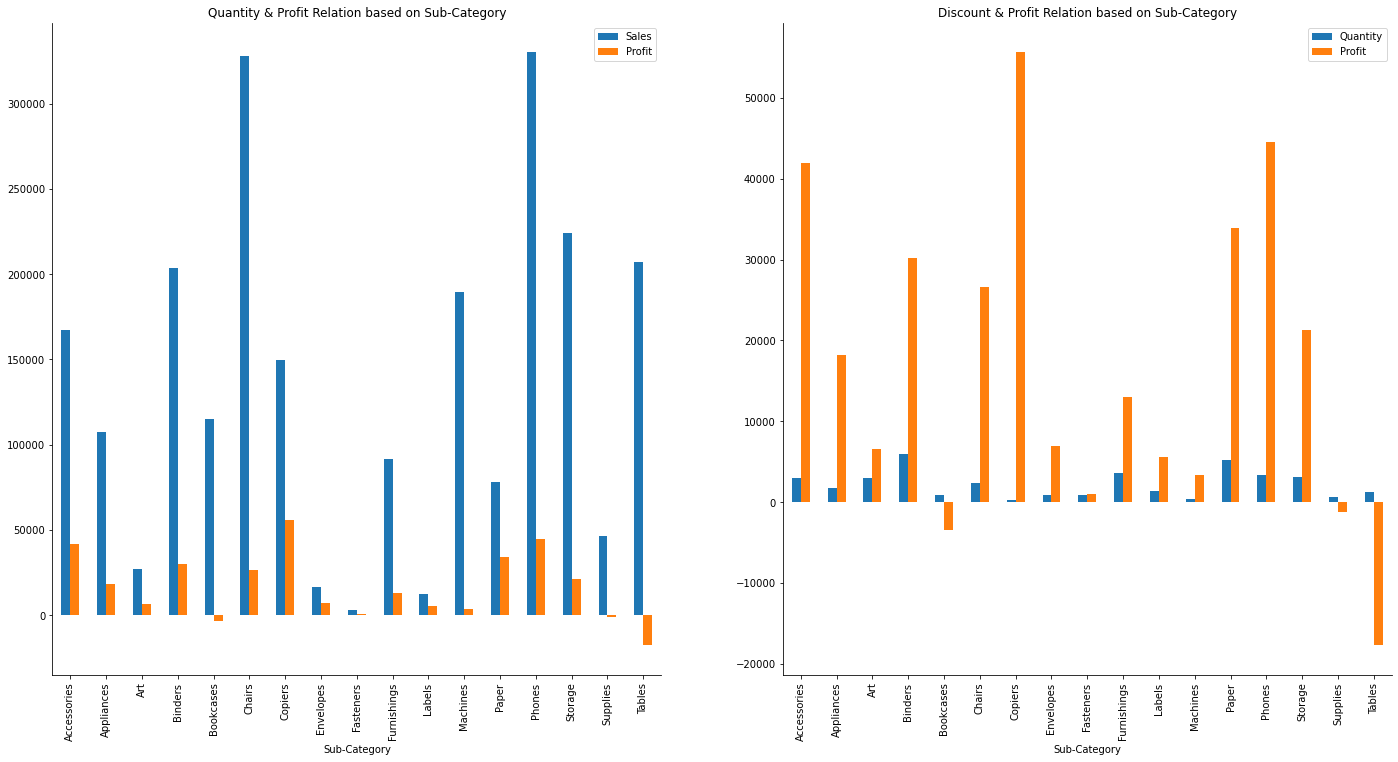

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(24,12))
data.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='bar',ax=axes[0]).set_title('Quantity & Profit Relation based on Sub-Category')
data.groupby('Sub-Category')['Quantity','Profit'].agg(sum).plot(kind='bar',ax=axes[1]).set_title('Discount & Profit Relation based on Sub-Category')
plt.xticks(rotation=90)
plt.show()

<Figure size 1080x576 with 0 Axes>

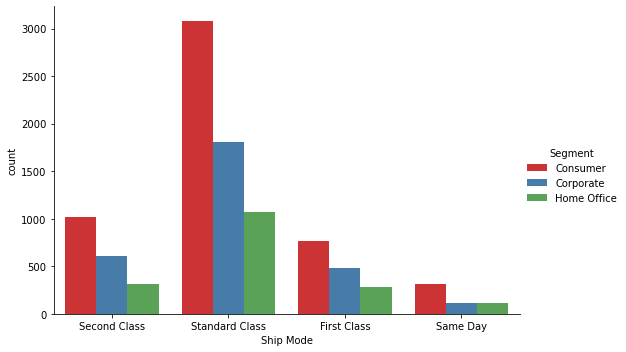

In [53]:
# Segment wise count of the shipment modes

plt.figure(figsize=(15,8))
sns.catplot("Ship Mode", hue="Segment", data=data, kind="count", aspect=1.5, palette="Set1")

<AxesSubplot:xlabel='Region', ylabel='Sales'>

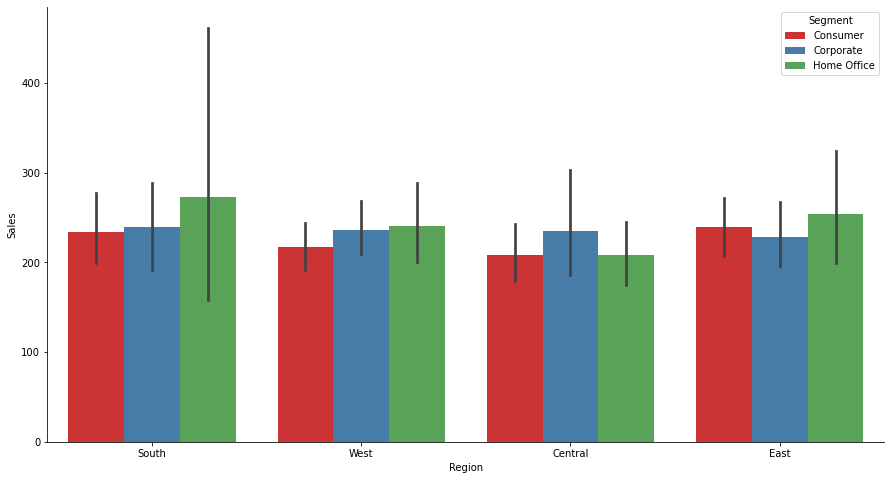

In [15]:
# Segment wise sales in each region

plt.figure(figsize=(15,8))
sns.barplot(x="Region", y="Sales", hue="Segment", data=data, palette="Set1")

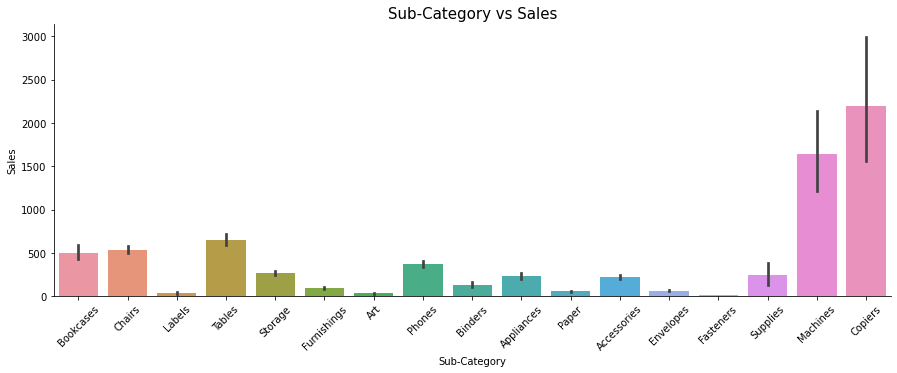

In [18]:
# Sub-category vs Sales

plt.figure(figsize = (15,5))
sns.barplot(x="Sub-Category", y="Sales", data=data)
plt.title('Sub-Category vs Sales', size=15)
ax = plt.xticks(rotation=45)

Text(0, 0.5, 'Sales')

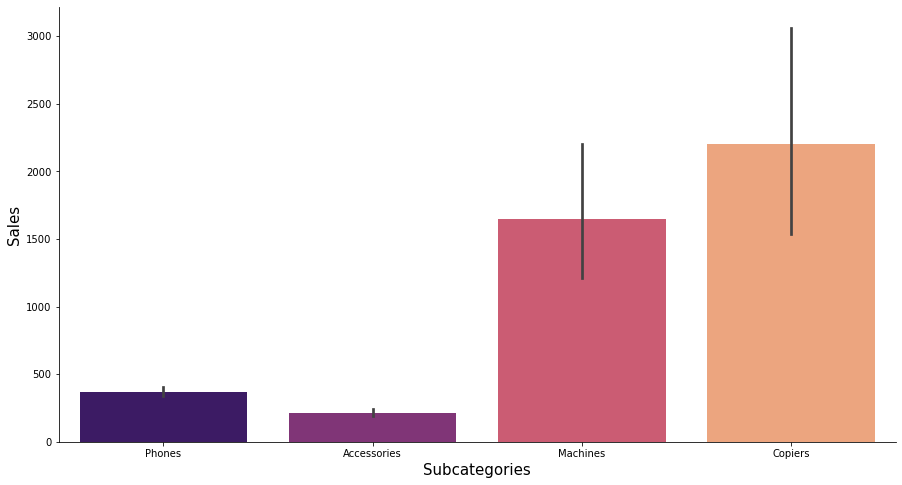

In [19]:
tech_df = data[(data['Category']=="Technology")]

# Sales of each Subcategory under Technology

plt.figure(figsize=[15,8])
sns.barplot(x="Sub-Category", y="Sales", data=tech_df, palette="magma")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

## Insights using stats

In [23]:
grouped = data.groupby("City")

# Aggregated Sales per city
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()

# Cities with highest total sales
agg_sales.head()

,City,Sales
0,New York City,256319.041
1,Los Angeles,175831.901
2,Seattle,119460.282
3,San Francisco,112577.172
4,Philadelphia,109061.461


### New York City has the most sales followed by Los Angeles and Seattle.

In [25]:
# Aggregated Profit per city
agg_profit=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()

# Cities with Highest total Profit
agg_profit.head()

,City,Profit
0,New York City,62013.8973
1,Los Angeles,30431.4267
2,Seattle,29121.6825
3,San Francisco,17466.1186
4,Detroit,13146.6935


### Similarly most profit is earned from New York City followed by Los Angeles and Seattle.

In [26]:
# Aggregate Discount per city
agg_disc=grouped['Discount'].agg(np.sum).sort_values(ascending=False).reset_index()

# Cities with highest aggregated Discount
agg_disc.head()

,City,Discount
0,Philadelphia,175.30
1,Houston,142.74
2,Chicago,119.70
3,Dallas,56.30
4,Los Angeles,55.50


### Interestingly highest total discount is for Philadelphia followed by Houston and Chicago. But they do not lead the Sales and Profit table!

In [28]:
# Average Sales per city
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()

# Cities with highest Average sales
avg_sales.head()

,City,Sales
0,Jamestown,2354.395000
1,Cheyenne,1603.136000
2,Bellingham,1263.413333
3,Independence,1208.685000
4,Burbank,1082.386000


In [29]:
# Cities with lowest Average sales
avg_sales.tail()

,City,Sales
526,Ormond Beach,2.808
527,Pensacola,2.214
528,Jupiter,2.064
529,Elyria,1.824
530,Abilene,1.392


In [30]:
# Average Profit per city
avg_profit=grouped['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()

# Cities with highest Average profit
avg_profit.head()

,City,Profit
0,Jamestown,642.885750
1,Independence,487.831500
2,Lafayette,323.173794
3,Minneapolis,296.721070
4,Appleton,277.383150


In [31]:
# Cities with lowest Average profit
avg_profit.tail()

,City,Profit
526,Lancaster,-157.371052
527,Round Rock,-169.061614
528,Oswego,-178.709200
529,Champaign,-182.352000
530,Bethlehem,-200.619160


In [32]:
# Average Discount per city
avg_disc=grouped['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()

# Cities with highest Average discount
avg_disc.head()

,City,Discount
0,Missouri City,0.8
1,Romeoville,0.8
2,Deer Park,0.8
3,Abilene,0.8
4,Elyria,0.7


In [33]:
# Cities with lowest Average Discount
avg_disc.tail()

,City,Discount
526,Mobile,0.0
527,Montebello,0.0
528,Montgomery,0.0
529,Moorhead,0.0
530,Aberdeen,0.0


### Something new, in all these average calculations, the Cities which topped the total Sales, total Profit and total Discount, are not leading here. But the overall scenario can be obtained from these average values.

In [42]:
# Cities having High Average Discounts
high_dist=avg_disc[avg_disc['Discount'] >=0.7]

# Cities having low Average Discounts
low_dist=avg_disc[avg_disc['Discount']==0]

# Cities having High Average Sales
high_sales=avg_sales[avg_sales['Sales']>500]

# Cities having low Average Sales
low_sales=avg_sales[avg_sales['Sales']<50]

# Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit']>100]

# Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit']<0]

In [43]:
# Cities with High-Average-Discounts but Low-Average-Sales
merged= pd.merge(high_dist,low_sales, on=['City'],how='inner')
merged

,City,Discount,Sales
0,Missouri City,0.8,6.370
1,Romeoville,0.8,8.952
2,Deer Park,0.8,6.924
3,Abilene,0.8,1.392
4,Elyria,0.7,1.824
5,Ormond Beach,0.7,2.808
6,Pensacola,0.7,2.214


### **Important Insight:-** Here we can see 7 Cities where the Company is giving high discounts but Sales are very low. And as the company is already giving such high discounts, there is no question of increasing discount further. Hence here our investment is won't be fruitful.

In [45]:
merged2= pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged2

,City,Sales,Profit
0,Jamestown,2354.395000,642.885750
1,Cheyenne,1603.136000,100.196000
2,Bellingham,1263.413333,203.530267
3,Independence,1208.685000,487.831500
4,Burbank,1082.386000,254.844600
5,Beverly,861.063333,218.306467
6,Appleton,835.655000,277.383150
7,Lafayette,807.619355,323.173794
8,Torrance,783.067000,136.287750
9,Lehi,758.363000,225.831300


### **Important Insight:-** The stats above are very pleasing. In the above 23 Cities the sales as well as profit is quite good. Hence if we can invest in these cities (in terms of Discount and other aspects), business can increase more. These can be termed as the Hot-Spots.

In [46]:
# Cities where Average Discount is less but Average Sales are High

merged3= pd.merge(low_dist,high_sales, on='City', how='inner')
merged3

,City,Discount,Sales
0,Appleton,0.0,835.655000
1,Saint Peters,0.0,697.160000
2,Harrisonburg,0.0,626.958571
3,Independence,0.0,1208.685000
4,Jamestown,0.0,2354.395000
5,Lafayette,0.0,807.619355
6,Dubuque,0.0,562.433333
7,Noblesville,0.0,772.795000
8,Norman,0.0,675.665000
9,Beverly,0.0,861.063333


### **Important Insight:-** These 13 cities are generating high average sales in spite of no discount! Hence if our investments can be increased in these cities, then huge sales as well as huge profits can be driven from these Cities.

In [48]:
# Cities with high Average sales but low Average profit

merged4= pd.merge(high_sales,low_profit, on='City', how='inner')
merged4

,City,Sales,Profit
0,Burlington,866.723280,-144.915088
1,Round Rock,693.436114,-169.061614
2,Richardson,644.232000,-12.244650


### **Important Insight:-** In above 3 cities, there is a good amount of sales but the company is in loss here. Hence focus can be shifted from here.

In [50]:
# Cities with high Average discount but low Average profit

merged5= pd.merge(high_dist,low_profit, on='City', how='inner')
merged5

,City,Discount,Profit
0,Missouri City,0.8,-9.5550
1,Romeoville,0.8,-14.7708
2,Deer Park,0.8,-10.3860
3,Abilene,0.8,-3.7584
4,Elyria,0.7,-1.3984
5,Littleton,0.7,-98.8018
6,Ormond Beach,0.7,-1.9656
7,Pensacola,0.7,-1.4760


### **Important Insight:-** The above 8 countries gets highest average Discount, but here the business is generating loss! Either strong focus should be given in these cities to find out the faults or the discounts should be decreased to make up the loss.

In [49]:
# Cities with low Average discount but High Average profit

merged6= pd.merge(low_dist, high_profit, on='City', how='inner')
merged6

,City,Discount,Profit
0,Atlanta,0.0,179.324690
1,Roswell,0.0,134.857517
2,Appleton,0.0,277.383150
3,Saint Cloud,0.0,156.538000
4,Vacaville,0.0,110.052800
5,Saint Peters,0.0,146.403600
6,Washington,0.0,105.958930
7,Warwick,0.0,212.759120
8,Virginia Beach,0.0,126.555231
9,Harrisonburg,0.0,127.074843


### **Important Insight:-** Here are the 27 cities, where the company is not at all providing any discount, yet these cities are generating good amount of profit. Hence more and more care is to be taken and investments are to be made in these kinds of Hot-Spots!

# Conclusion

## Conidering the above insights, if the company follows the suggestions provided throughout the above analysis, it is sure to improve the sales as well as the profit while cutting out on some losses.